In [28]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [29]:
import imageio

dir_path = "../data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, format='DICOM')
type(vol_arr), vol_arr.shape, vol_arr.dtype

Reading DICOM (examining files): 99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)


(imageio.core.util.Array, (99, 512, 512), dtype('int16'))

In [31]:
vol_arr[0]

Array([[ -985,  -990,  -999, ..., -1017, -1008,  -971],
       [-1016,  -984,  -963, ..., -1000, -1009,  -999],
       [-1024, -1008,  -996, ...,  -979, -1021,  -987],
       ...,
       [ -920,  -942,  -944, ...,  -893,  -917,  -955],
       [ -871,  -879,  -905, ...,  -895,  -869,  -867],
       [ -876,  -855,  -873, ...,  -933,  -982,  -936]], dtype=int16)

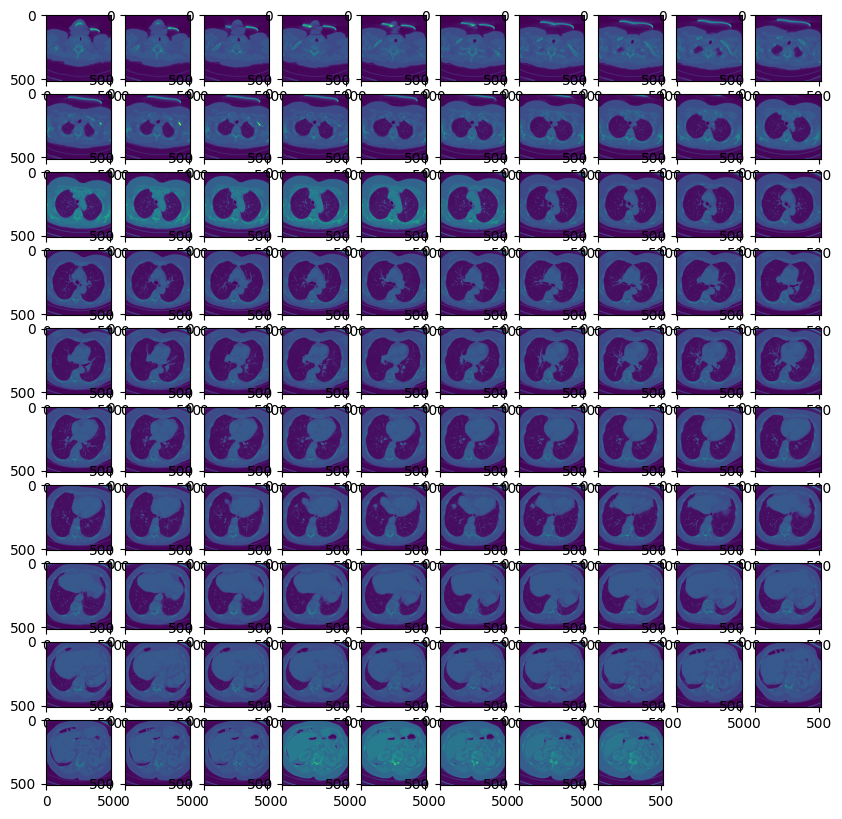

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
for id in range(1, 99):
    fig.add_subplot(10, 10, id)
    plt.imshow(vol_arr[id])
plt.show()

In [32]:
for depth in range(99):
    mean = np.mean(vol_arr[depth, :])
    std = np.std(vol_arr[depth, :])
    vol_arr[depth, :] = (vol_arr[depth, :] - mean) / std

In [33]:
vol_arr[0]

Array([[-1, -1, -1, ..., -1, -1,  0],
       [-1,  0,  0, ..., -1, -1, -1],
       [-1, -1, -1, ...,  0, -1, -1],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int16)

In [37]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

vol.shape, vol.dtype

(torch.Size([1, 99, 512, 512]), torch.float32)

In [38]:
vol[0]

tensor([[[-1., -1.,  ..., -1.,  0.],
         [-1.,  0.,  ..., -1., -1.],
         ...,
         [ 0.,  0.,  ...,  0.,  0.],
         [ 0.,  0.,  ...,  0.,  0.]],

        [[-1., -1.,  ..., -1., -1.],
         [-1., -1.,  ..., -1., -1.],
         ...,
         [ 0.,  0.,  ...,  0.,  0.],
         [ 0.,  0.,  ...,  0., -1.]],

        ...,

        [[-1., -1.,  ..., -1., -1.],
         [-1., -1.,  ..., -1., -1.],
         ...,
         [-1., -1.,  ..., -1., -1.],
         [-1., -1.,  ..., -1., -1.]],

        [[-1., -1.,  ..., -1., -1.],
         [-1., -1.,  ..., -1., -1.],
         ...,
         [-1., -1.,  ..., -1., -1.],
         [-1., -1.,  ..., -1., -1.]]])